In [11]:
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt

mydb = mysql.connector.connect(
    host="LAPTOP-R2FSBDG6",
    user="nathan",
    password="nathan",
    database="appointments"
)


<Figure size 1000x800 with 0 Axes>

In [43]:
import pandas as pd

cursor = mydb.cursor()
cursor.execute("""
SELECT c.clinicid, c.hospitalname, a.type, a.status, COUNT(a.pxid) as total_appointments
FROM appointments a
JOIN clinics c ON a.clinicid = c.clinicid
GROUP BY c.clinicid, a.type, a.status;
""")

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['clinicid', 'hospitalname', 'type', 'status', 'total_appointments'])

print(df.head())


                           clinicid                  hospitalname  \
0  2AA49677FDDF127F4230C74ECE40B8A7        St. Elizabeth Hospital   
1  265ECEB6D4D961057F1B483A558E2885  Our Lady of Lourdes Hospital   
2  197E342C9FBAD962DBE6D3322F723CA6     Calamba Doctor's Hospital   
3  841B60E20FF680B0D59AA9D6902FE289         Makati Medical Center   
4  D9BD3E8809C72D9493D84928AB8C4497   Novaliches General Hospital   

           type    status  total_appointments  
0  Consultation  Complete               14786  
1  Consultation  Complete               17286  
2  Consultation  Complete                1065  
3  Consultation  Complete                1697  
4  Consultation    Queued                1007  


C:\Users\Isaiah\AppData\Local\Temp\ipykernel_14652\3668423254.py:1: FutureWarning: The provided callable <function sum at 0x0000025C67A542C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_df = df.pivot_table(index='hospitalname', columns=['type', 'status'], values='total_appointments', aggfunc=np.sum, fill_value=0)


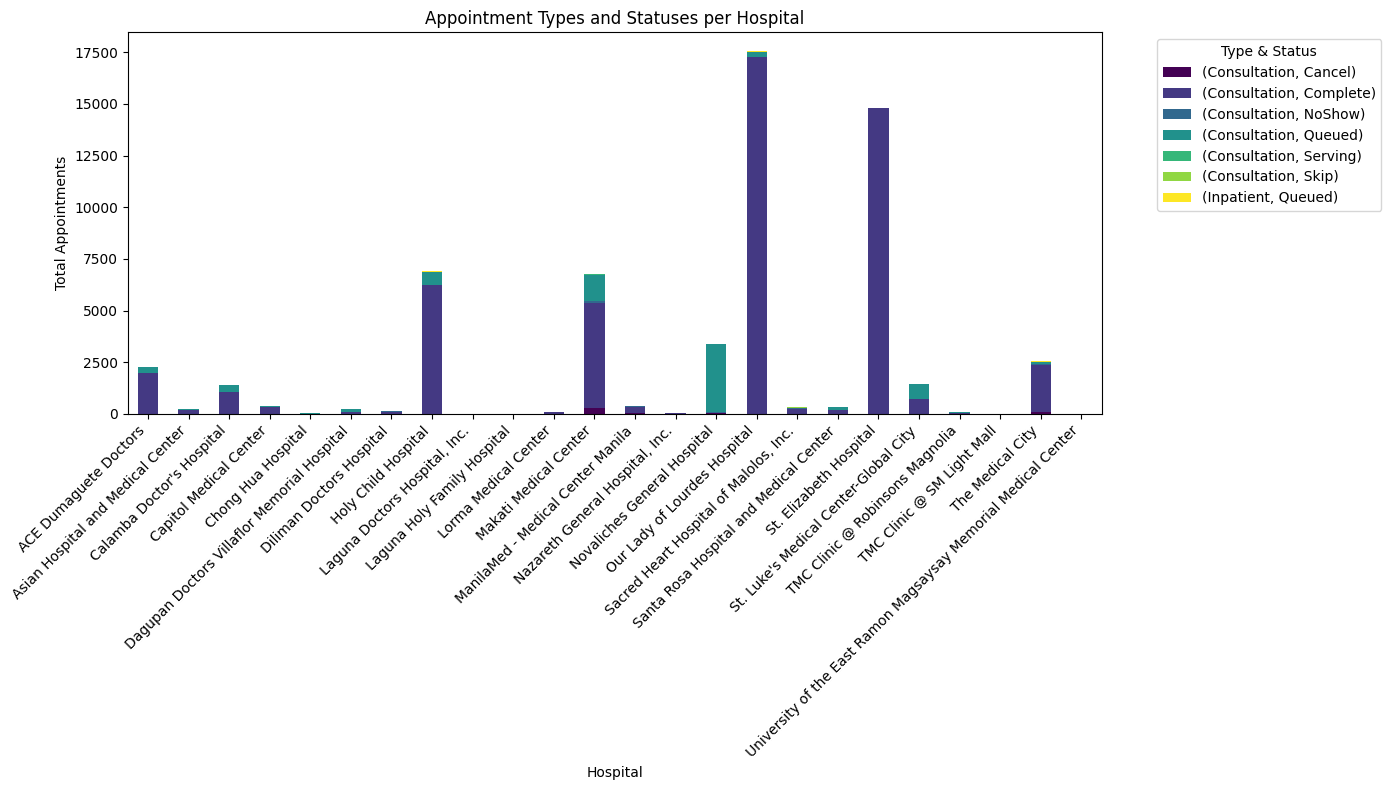

In [44]:
pivot_df = df.pivot_table(index='hospitalname', columns=['type', 'status'], values='total_appointments', aggfunc=np.sum, fill_value=0)

pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis') 

plt.title('Appointment Types and Statuses per Hospital')
plt.xlabel('Hospital')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Type & Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


In [12]:

cursor = mydb.cursor()

cursor.execute("""
SELECT c.clinicid, c.hospitalname, COUNT(a.pxid) as total_appointments
FROM appointments a
JOIN clinics c ON a.clinicid = c.clinicid
GROUP BY c.clinicid;
""")


result = cursor.fetchall

In [13]:

hospital = []
total_appointments = []

for i in cursor:
    hospital.append(i[1])
    total_appointments.append(i[2])

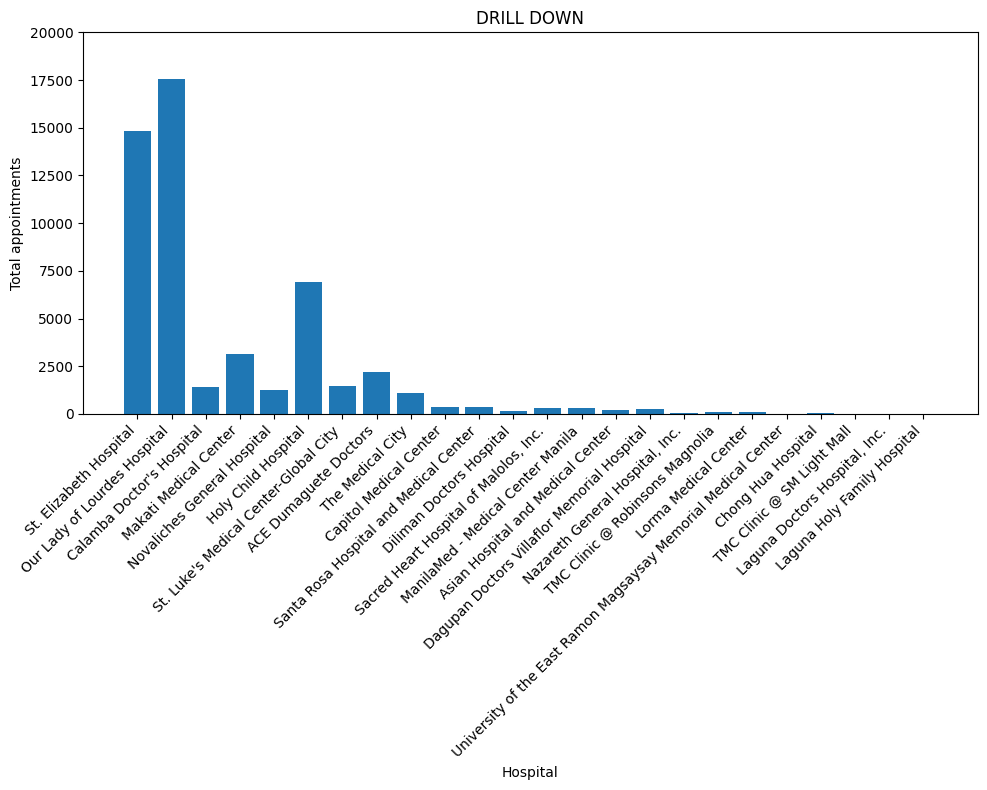

In [42]:
plt.figure(figsize=(10, 8))
plt.bar(hospital, total_appointments)
plt.ylim(0, 20000)
plt.xlabel("Hospital")
plt.ylabel("Total appointments")
plt.title("DRILL DOWN")
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.tight_layout()
plt.show()


In [48]:
cursor.execute("""
SELECT c.RegionName, COUNT(a.pxid) as virtual_appointments
FROM appointments a
JOIN clinics c ON a.clinicid = c.clinicid
WHERE a.Virtual = '1'
GROUP BY c.RegionName;
""")

result = cursor.fetchall

In [49]:

data = cursor.fetchall()

df = pd.DataFrame(data, columns=['RegionName', 'virtual_appointments'])

print(df.head())

  RegionName  virtual_appointments
0        NCR                  1041
1        XII                    24
2        VII                     6
3       IV-A                     2


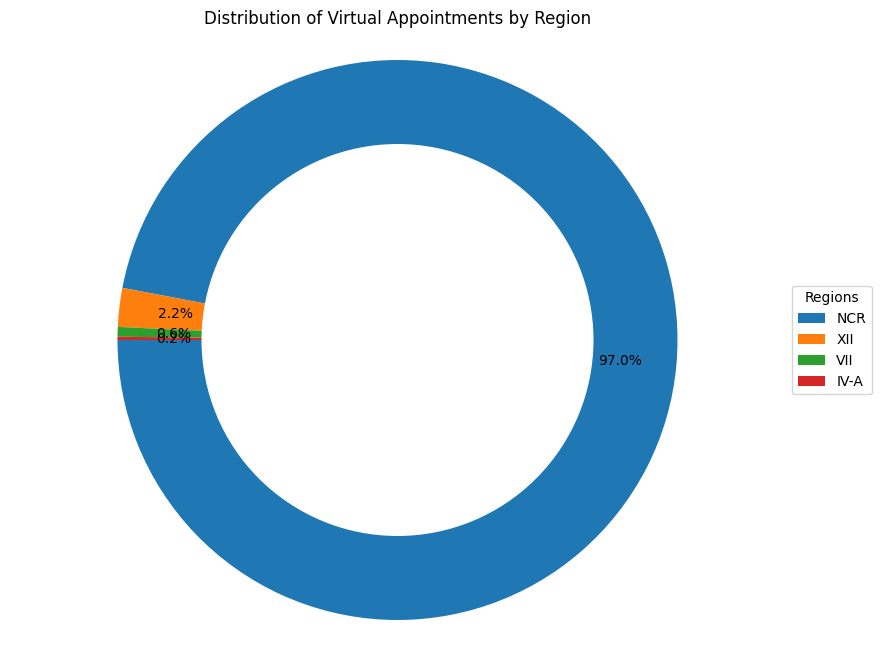

In [64]:
# Create a donut plot
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(df['virtual_appointments'], autopct='%1.1f%%', startangle=180, pctdistance=0.8, wedgeprops=dict(width=1))

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(wedges, df['RegionName'], title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Distribution of Virtual Appointments by Region')
plt.axis('equal') 
plt.show()


In [27]:
cursor.execute("""
SELECT D.mainspecialty, COUNT(*) as appointment_count
FROM doctors D
JOIN appointments A ON D.doctorid = A.doctorid
JOIN px P ON A.pxid = P.pxid
WHERE P.gender = 'Male' AND P.age > 40
GROUP BY D.mainspecialty;
""")


result = cursor.fetchall

In [28]:

specialty = []
appointments = []

for i in cursor:
    specialty.append(i[0])
    appointments.append(i[1])

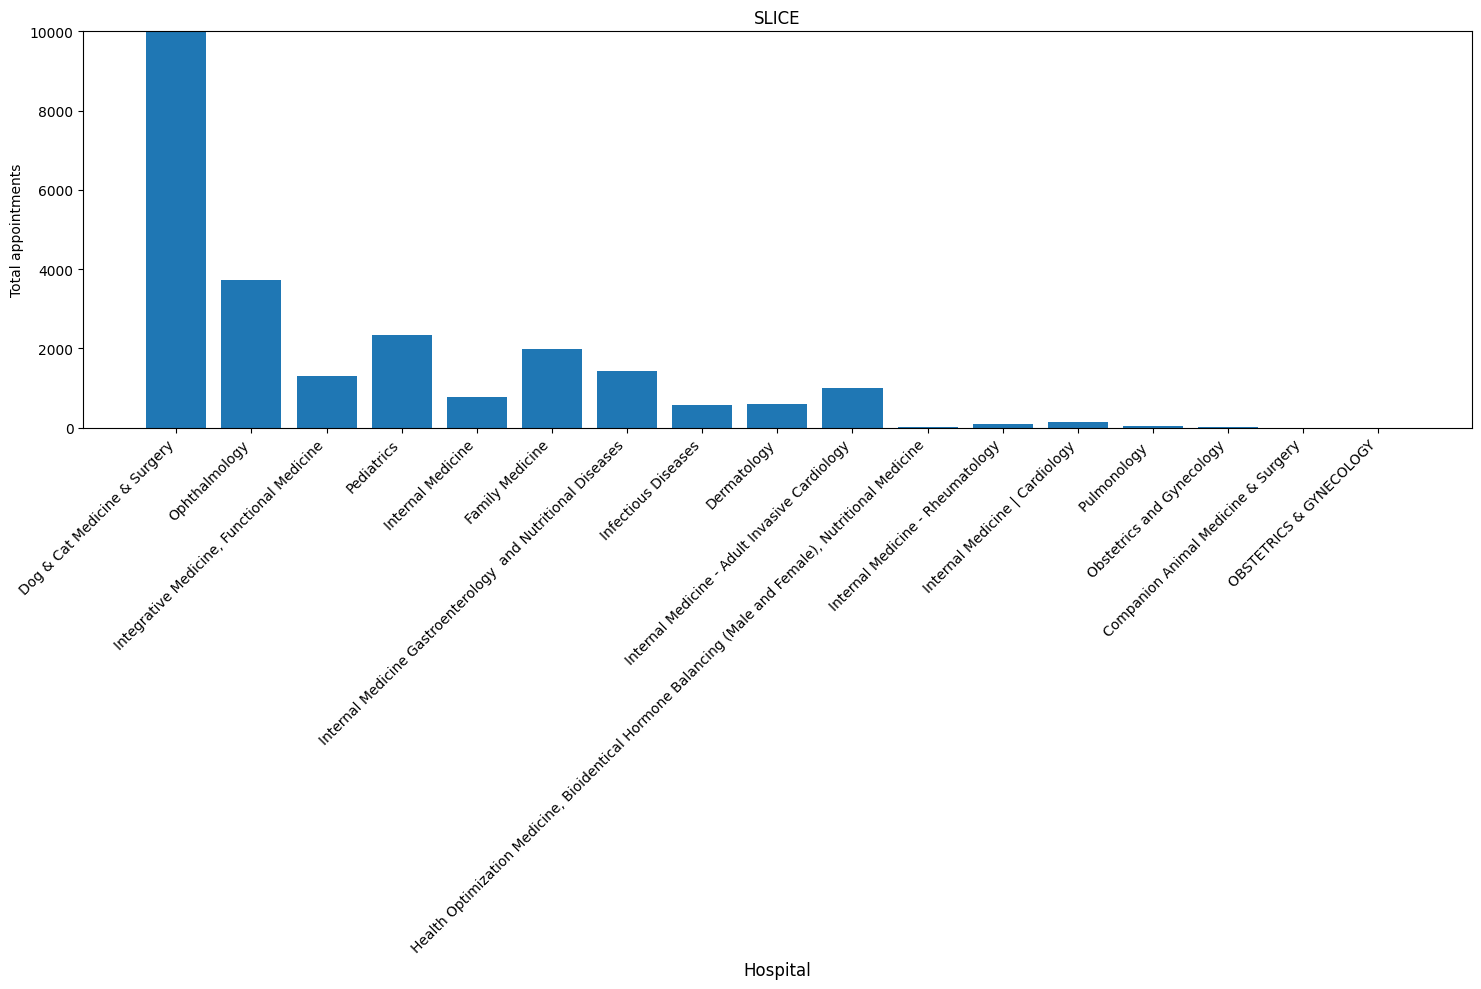

In [35]:
plt.figure(figsize=(15, 10))
plt.bar(specialty, appointments)
plt.ylim(0, 10000)
plt.xlabel("Hospital", size = 12)
plt.ylabel("Total appointments")
plt.title("SLICE")
plt.xticks(rotation=45, ha="right", fontsize=10) 
plt.tight_layout()
plt.show()